In [1]:
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
df = pd.read_csv("books.csv", on_bad_lines='skip')

In [4]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.shape

(11123, 12)

In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
df.columns=df.columns.str.strip()   #remove space in columns

In [8]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [9]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [10]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [11]:
df.describe(include=object) #check summary of object data

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [12]:
df.isnull().sum()   #check the null value

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [13]:
df.duplicated().any()   #check the duplicate value

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


## Feature Engineering

    ~ Extract Important Features

    ~ Reducing the size of Features

    ~ Creating new features from existring ones

In [15]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [16]:
df.isbn.nunique()

11123

In [17]:
df.isbn13.nunique()

11123

In [18]:
df.drop(['bookID','isbn', 'isbn13'],axis=1,inplace=True)   #drop unnecessary columns

In [19]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [20]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [21]:
df['year'] = df['publication_date'].str.split('/')  #The str.split('/') method is used to split each string in the 'publication_date' column into a list of substrings, using '/' as the delimiter.
df['year'] = df['year'].apply(lambda x:x[2]) #The apply method is used to apply a function to each element of the 'year' column. In this case, the function is a lambda function (an anonymous inline function) that extracts the third element (index 2) from each list.

In [22]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [23]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [24]:
df['year'] = df['year'].astype('int')

In [25]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [26]:
df['year'].min()

1900

In [27]:
df['year'].max()

2020

## Exploratory Data Analysis

In [28]:
df[df['year'] == 2020][['title','authors','average_rating', 'language_code','publisher']]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [29]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending=False).head(20)     #which book relase in which year and name

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_17984\1955327273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='authors',data=df,


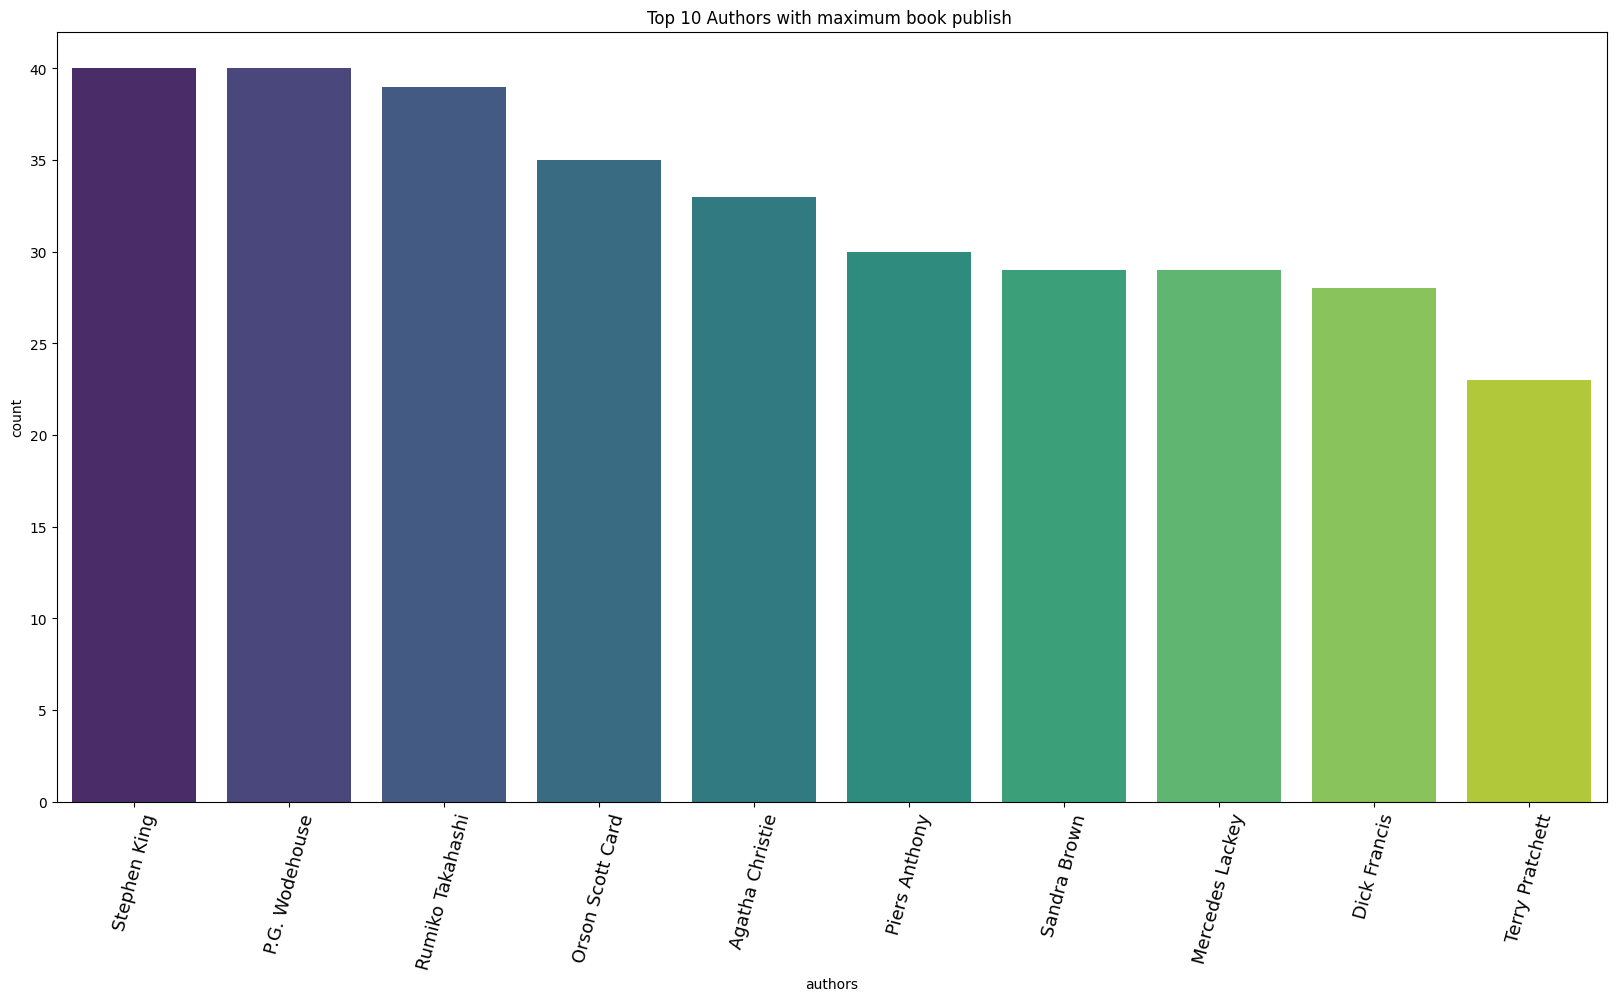

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x='authors',data=df,
              order=df['authors'].value_counts().iloc[:10].index, palette='viridis')
plt.title("Top 10 Authors with maximum book publish ") 
plt.xticks(rotation=75,fontsize=13)
plt.show()     #highest book publish by authors

In [31]:
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [32]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [33]:
df.groupby(['language_code'])[['average_rating',
                               'ratings_count',
                               'text_reviews_count']].agg('mean').style.background_gradient(cmap='CMRmap_r')

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [34]:
book = df['title'].value_counts()[:20]
book

title
The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Sense and Sensibility         6
Robinson Crusoe               6
Treasure Island               6
Jane Eyre                     6
Romeo and Juliet              6
Collected Stories             6
The Secret Garden             6
The Scarlet Letter            6
The Great Gatsby              6
Frankenstein                  5
Name: count, dtype: int64

C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_17984\1429757129.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book.index , y=book,


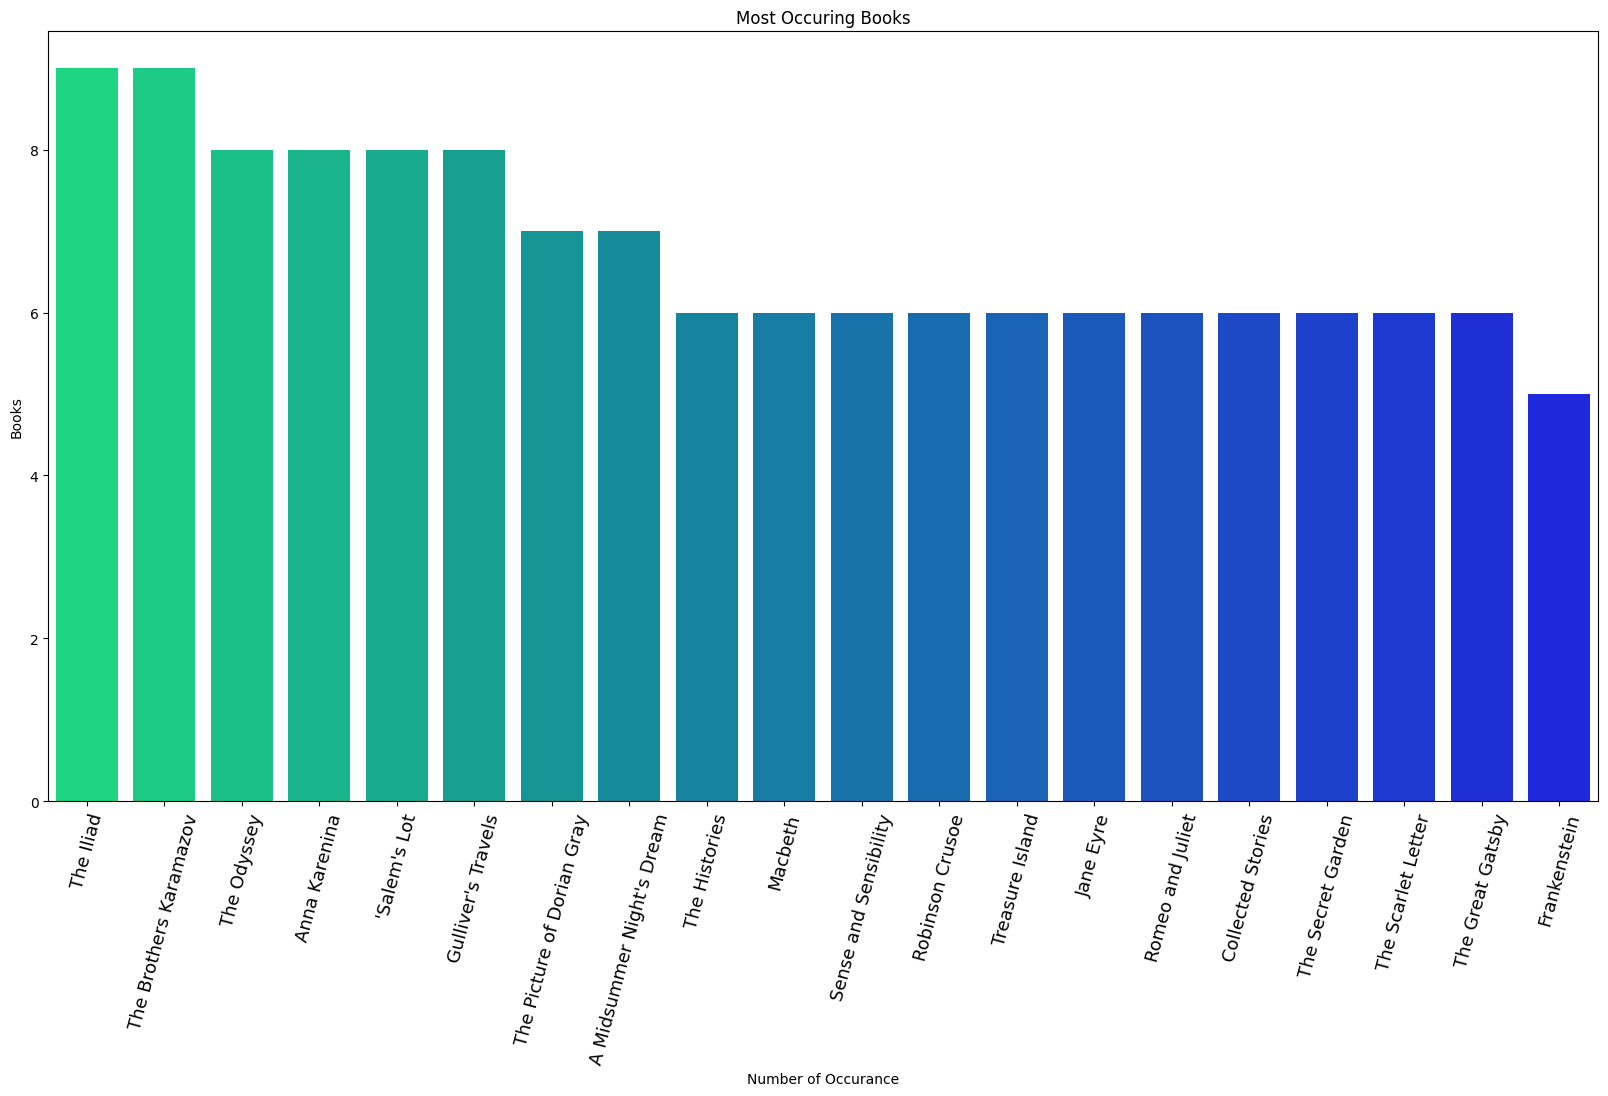

In [35]:
# to find most occuring book in our data
plt.figure(figsize=(20,10))
book = df['title'].value_counts()[:20]
sns.barplot(x=book.index , y=book,
            palette='winter_r') 
plt.title('Most Occuring Books')
plt.xlabel('Number of Occurance')
plt.ylabel('Books')
plt.xticks(rotation=75,fontsize=13)
plt.show()


C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_17984\3493288629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


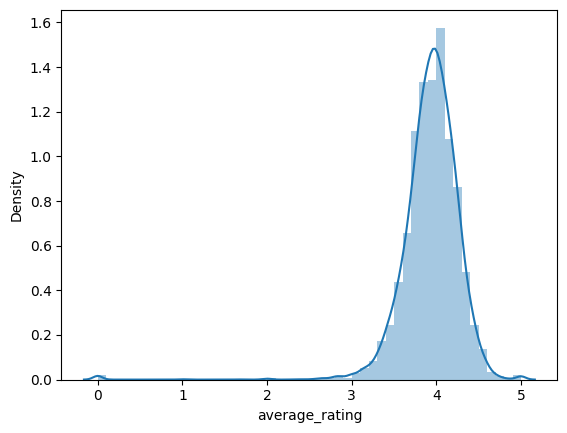

In [36]:
sns.distplot(df['average_rating'])
plt.show()

In [37]:
df[df.average_rating== df.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


In [38]:
publisher = df['publisher'].value_counts()[:20]
publisher

publisher
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: count, dtype: int64

C:\Users\DINESHASHUTOSH\AppData\Local\Temp\ipykernel_17984\2398991999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher.index,y=publisher, palette='viridis')


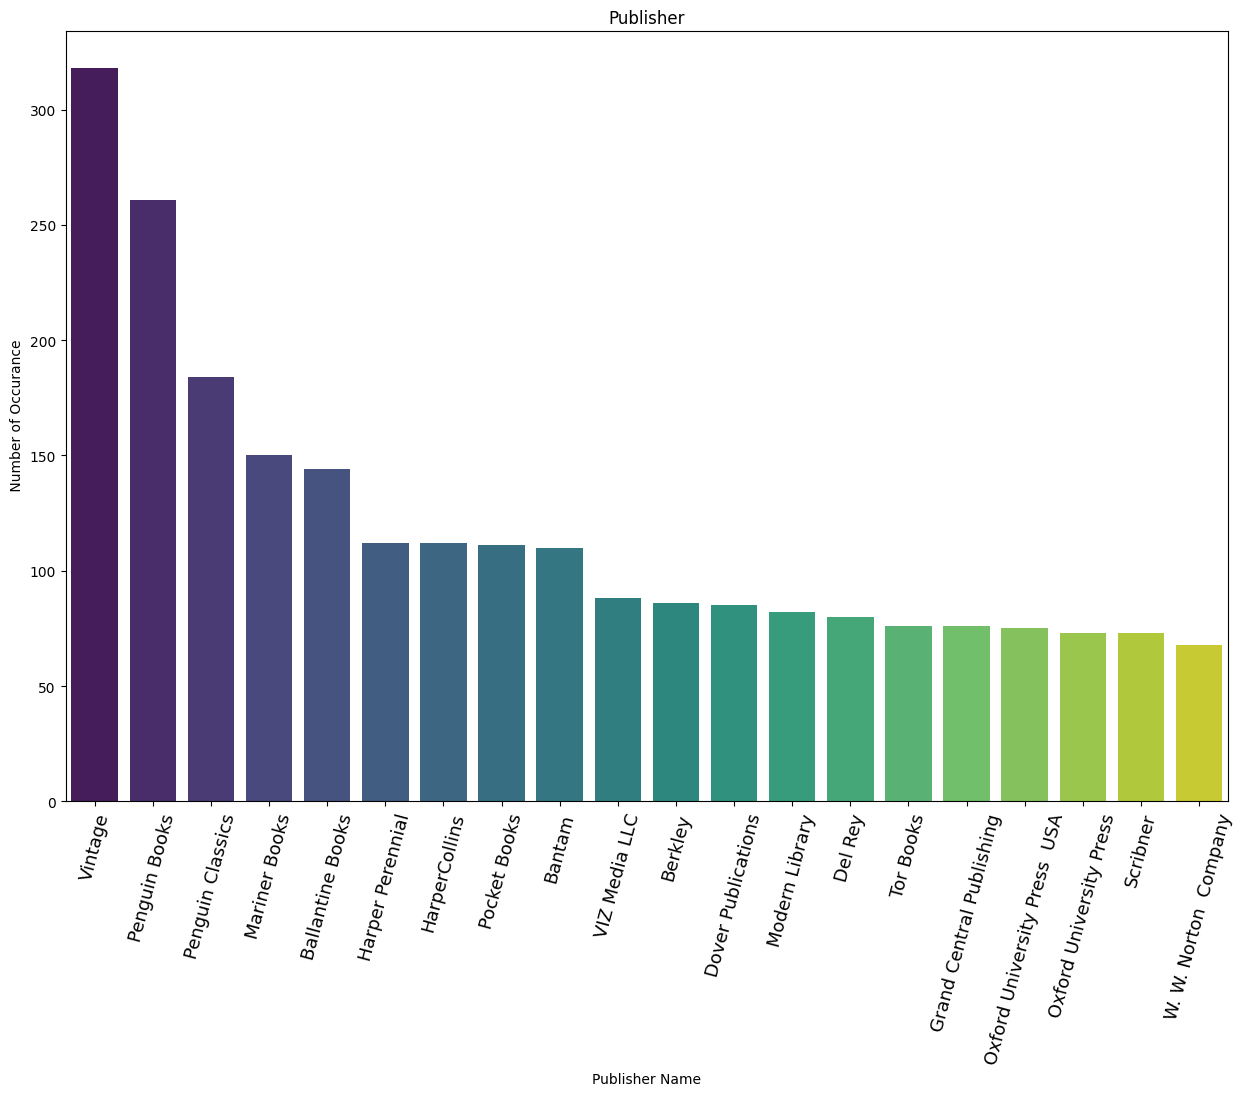

In [39]:
plt.figure(figsize=(15,10))
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x=publisher.index,y=publisher, palette='viridis')
plt.title("Publisher")
plt.xlabel("Publisher Name")
plt.ylabel(" Number of Occurance")
plt.xticks(rotation=75,fontsize=13)
plt.show()



### Recommending Books based on Publishers
#### Recommending Books based on Authors
##### Recommending Books based on Language

In [40]:
df.publisher.value_counts()

publisher
Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
VeloPress                        1
Name: count, Length: 2290, dtype: int64

In [41]:
def recomd_books_publishers(x):
    a = df[df['publisher']== x][['title','average_rating']]
    a = a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

In [42]:
recomd_books_publishers('Vintage')

,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


In [43]:
recomd_books_publishers('Mariner Books')

,title,average_rating
4263,The Return of the King (The Lord of the Rings ...,4.53
5120,The Diary of Virginia Woolf Volume Five: 1936...,4.50
724,The Lord of the Rings- 3 volumes set (The Lord...,4.50
7187,Walking with the Wind: A Memoir of the Movement,4.49
5216,The Letters of Virginia Woolf: Volume Six 193...,4.48
2040,The Lord of the Rings: The Making of the Movie...,4.47
6802,The Second World War,4.45
2761,Poems New and Collected,4.43
5121,The Diary of Virginia Woolf Volume Three: 192...,4.42
5219,The Letters of Virginia Woolf: Volume Four 19...,4.41


In [44]:
@interact
def recomd_books_publisher(publisher_name=list(df['publisher'].value_counts().index)):
    a = df[df['publisher']== publisher_name][['title','average_rating']]
    a = a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [45]:
# Based upon Authors
@interact
def recomd_books_authors(authors_name=list(df['authors'].value_counts().index)):
    a = df[df['authors']== authors_name][['title','average_rating']]
    a = a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='authors_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko …

In [46]:
# Based upon Languages
@interact
def recomd_books_language(language=list(df['language_code'].value_counts().index)):
    a = df[df['language_code']== language][['title','average_rating']]
    a = a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

### Data Preprocessing

In [47]:
df.tail(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
11121,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco,2007
11122,Las aventuras de Tom Sawyer,Mark Twain,3.91,spa,272,113,12,5/28/2006,Edimat Libros,2006


In [48]:
def num_to_obj(x):
    if x > 0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x > 3 and x <=4:
        return "between 3 and 4"
    if x > 4 and x <=5:
        return "between 4 and 5"

df['rating_obj'] = df['average_rating'].apply(num_to_obj)
    

In [49]:
df['rating_obj'].value_counts()

rating_obj
between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

In [51]:
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.tail(2)

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
11121,False,False,False,True,False
11122,False,False,False,True,False


In [53]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
features = pd.concat([rating_df, language_df,df['average_rating'],df['ratings_count'],df['title']],axis=1)
features.set_index('title',inplace=True)


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [68]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

### Model Building

In [69]:
from sklearn import neighbors

In [70]:
model = neighbors.NearestNeighbors(n_neighbors=5,algorithm='ball_tree',
                                   metric='euclidean')
model.fit(features_scaled)
dist,idlist = model.kneighbors(features_scaled)
 

In [72]:
@interact
def BookRecomender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…